Importing the required packages. 

Loading the dataset.

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
file=pd.read_csv("Churn_Modelling.csv")
df=pd.DataFrame(file)
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df['HasCrCard'] = df['HasCrCard'].astype('category')
df['IsActiveMember'] = df['IsActiveMember'].astype('category')
df['Exited'] = df['Exited'].astype('category')


In [5]:
df = df.drop(columns=['RowNumber', 'Surname'])
df.head()


,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**Visualizations**


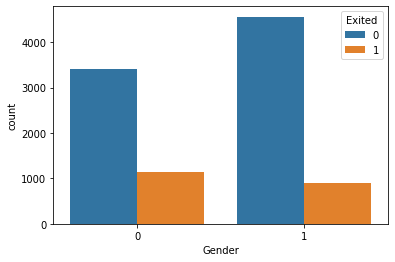

In [47]:
sns.countplot(data=df, x='Gender', hue="Exited");

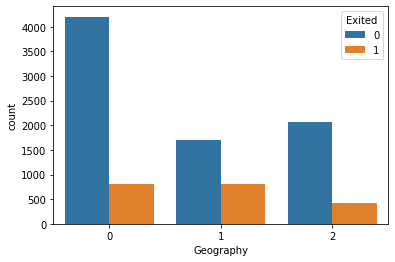

In [48]:
sns.countplot(data=df, x='Geography', hue="Exited");

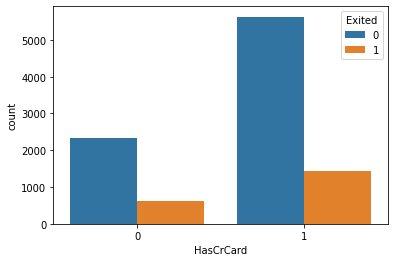

In [49]:
sns.countplot(data=df, x='HasCrCard', hue="Exited");

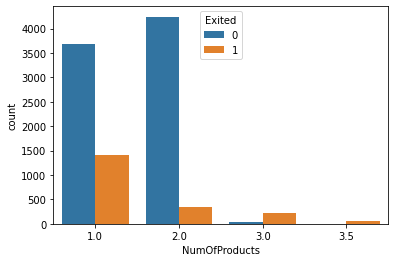

In [50]:
sns.countplot(data=df, x='NumOfProducts', hue="Exited");

**Perform descriptive statistics on the dataset.**

In [7]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CustomerId       10000 non-null  int64   
 1   CreditScore      10000 non-null  int64   
 2   Geography        10000 non-null  object  
 3   Gender           10000 non-null  object  
 4   Age              10000 non-null  int64   
 5   Tenure           10000 non-null  int64   
 6   Balance          10000 non-null  float64 
 7   NumOfProducts    10000 non-null  int64   
 8   HasCrCard        10000 non-null  category
 9   IsActiveMember   10000 non-null  category
 10  EstimatedSalary  10000 non-null  float64 
 11  Exited           10000 non-null  category
dtypes: category(3), float64(2), int64(5), object(2)
memory usage: 732.9+ KB


,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,100090.239881
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,57510.492818
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,51002.110000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,100193.915000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,149388.247500
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000


**Handle the Missing values.**

In [51]:
df.isna().sum()

CustomerId         0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

**Finding and replacing the outliers.**

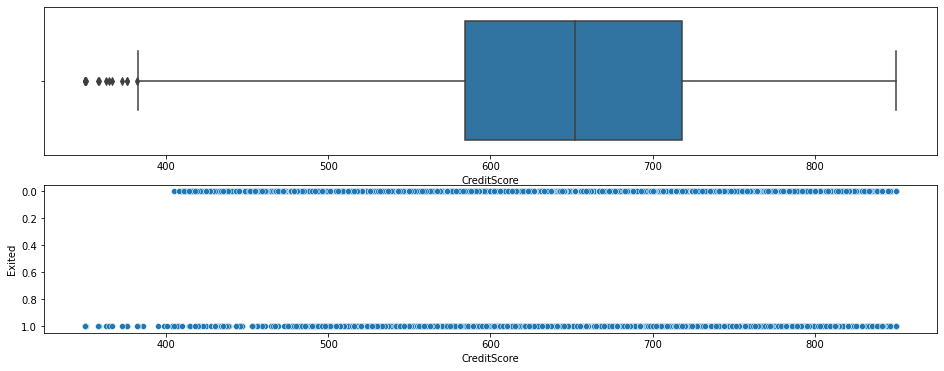

In [14]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(16,6))
sns.boxplot(data=df, x='CreditScore', ax=ax1)
sns.scatterplot(data=df, x='CreditScore',y='Exited',ax=ax2)
plt.tight_layout()

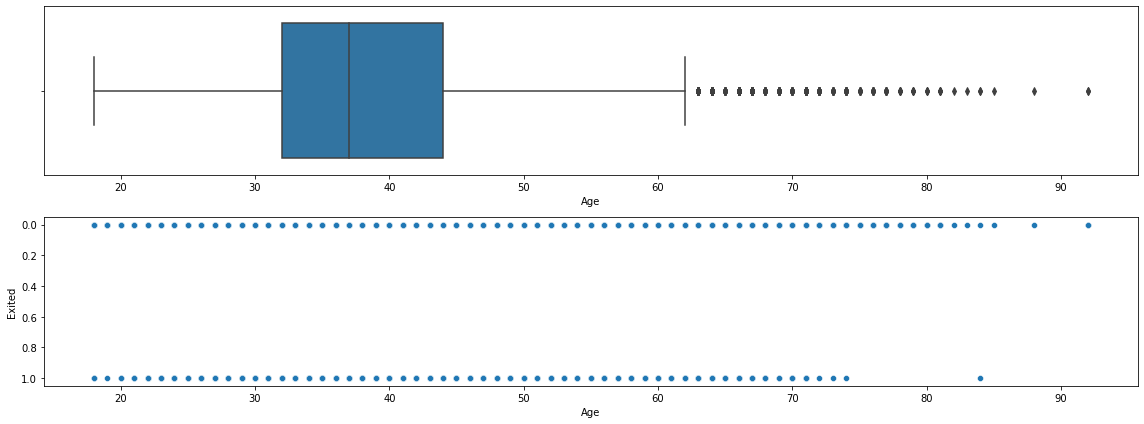

In [16]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(16,6))
sns.boxplot(data=df, x='Age', ax=ax1)
sns.scatterplot(data=df, x='Age',y='Exited',ax=ax2)
plt.tight_layout()


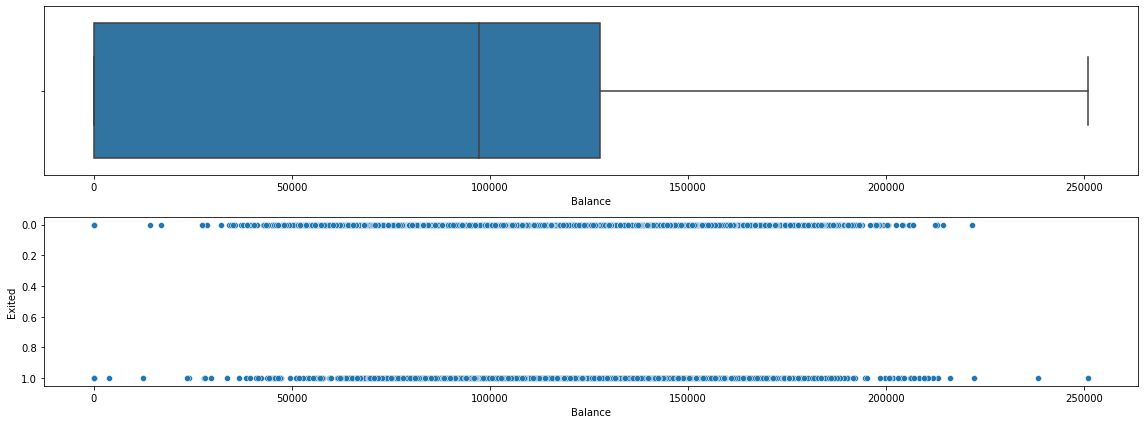

In [17]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(16,6))
sns.boxplot(data=df, x='Balance', ax=ax1)
sns.scatterplot(data=df, x='Balance',y='Exited',ax=ax2)
plt.tight_layout()

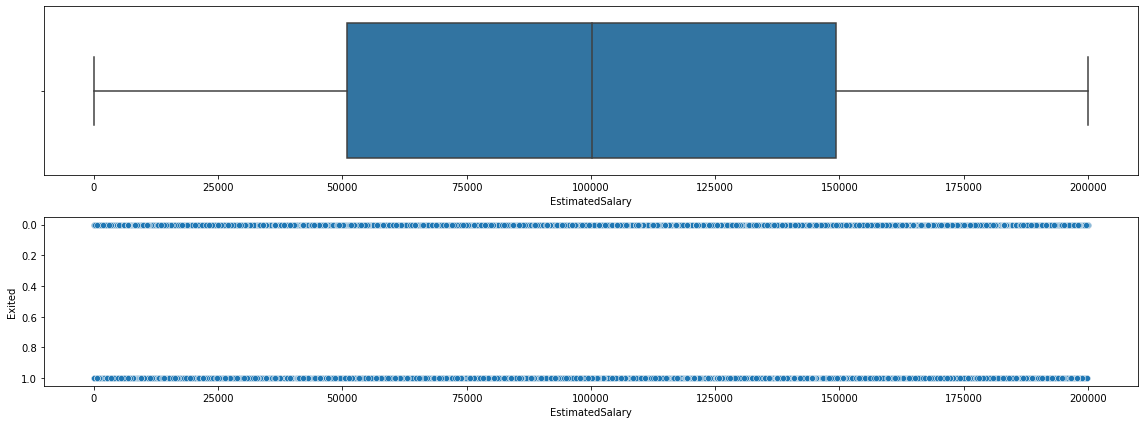

In [19]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(16,6))
sns.boxplot(data=df, x='EstimatedSalary', ax=ax1)
sns.scatterplot(data=df, x='EstimatedSalary',y='Exited',ax=ax2)
plt.tight_layout()

In [20]:
for i in df:
    if df[i].dtype=='int64' or df[i].dtypes=='float64':
        q1=df[i].quantile(0.25)
        q3=df[i].quantile(0.75)
        iqr=q3-q1
        upper=q3+1.5*iqr
        lower=q1-1.5*iqr
        df[i]=np.where(df[i] >upper, upper, df[i])
        df[i]=np.where(df[i] <lower, lower, df[i])


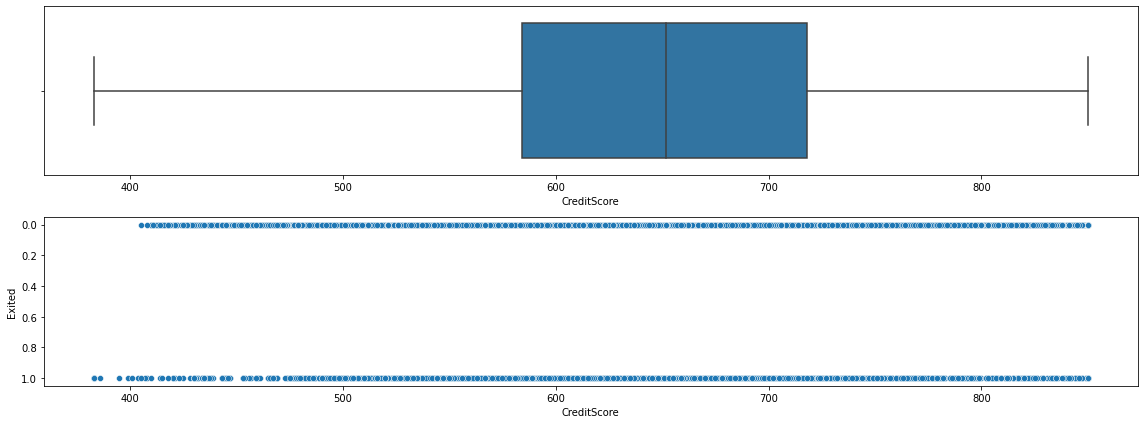

In [27]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(16,6))
sns.boxplot(data=df, x='CreditScore', ax=ax1)
sns.scatterplot(data=df, x='CreditScore',y='Exited',ax=ax2)
plt.tight_layout()

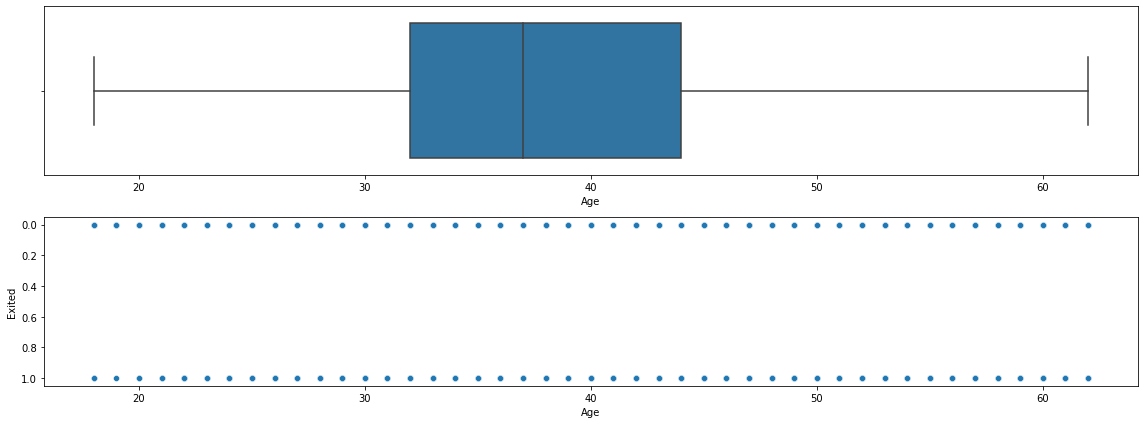

In [28]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(16,6))
sns.boxplot(data=df, x='Age', ax=ax1)
sns.scatterplot(data=df, x='Age',y='Exited',ax=ax2)
plt.tight_layout()


**Check for Categorical columns and perform encoding.**

In [32]:
encoder=LabelEncoder()
for i in df:

    if df[i].dtype=='object' or df[i].dtype=='category':
        df[i]=encoder.fit_transform(df[i])
        print(df[i])

**Split the data into dependent and independent variables.**

In [34]:
x=df.iloc[:,:-1]
x.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,15634602.0,619.0,0,0,42.0,2.0,0.00,1.0,1,1,101348.88
1,15647311.0,608.0,2,0,41.0,1.0,83807.86,1.0,0,1,112542.58
2,15619304.0,502.0,0,0,42.0,8.0,159660.80,3.0,1,0,113931.57
3,15701354.0,699.0,0,0,39.0,1.0,0.00,2.0,0,0,93826.63
4,15737888.0,850.0,2,0,43.0,2.0,125510.82,1.0,1,1,79084.10


In [35]:
y=df.iloc[:,-1]
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

**Scale the independent variables.**

In [36]:
scaler=StandardScaler()
x=scaler.fit_transform(x)
x


array([[-0.78321342, -0.32687761, -0.90188624, ...,  0.64609167,
         0.97024255,  0.02188649],
       [-0.60653412, -0.44080365,  1.51506738, ..., -1.54776799,
         0.97024255,  0.21653375],
       [-0.99588476, -1.53863634, -0.90188624, ...,  0.64609167,
        -1.03067011,  0.2406869 ],
       ...,
       [-1.47928179,  0.60524449, -0.90188624, ..., -1.54776799,
         0.97024255, -1.00864308],
       [-0.11935577,  1.25772996,  0.30659057, ...,  0.64609167,
        -1.03067011, -0.12523071],
       [-0.87055909,  1.4648682 , -0.90188624, ...,  0.64609167,
        -1.03067011, -1.07636976]])

**Split the data into training and testing**

In [55]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33)

In [58]:
x_train.shape




(6700, 11)

In [59]:
x_test.shape

(3300, 11)

In [61]:
y_train.shape

(6700,)

In [62]:
y_test.shape

(3300,)